In [2]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import importlib
import shutil

sys.path.append('/Users/john/Projects/SOTAEvaluationNoduleDetection/utilities')
sys.path.append('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/grt123')
sys.path.append('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/grt123/training')
sys.path.append('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/grt123/preprocessing/')

from layers import nms,iou
from summit_utils import *


%matplotlib inline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


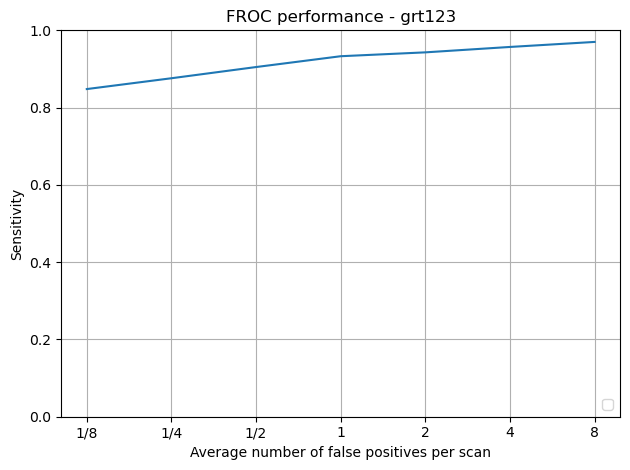

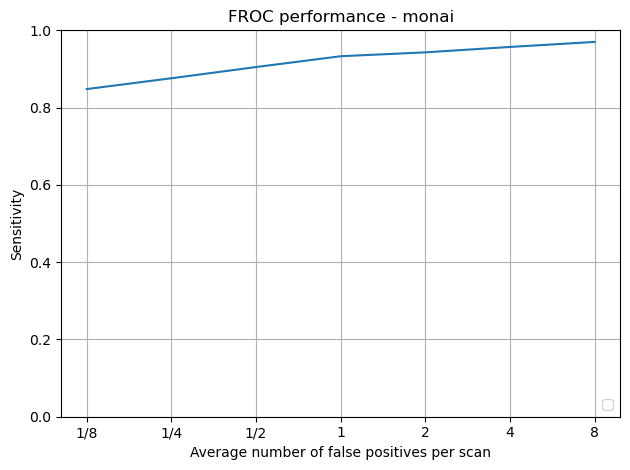

In [30]:
# LUNA16 Results Trained on LUNA16
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = [
    row.split('\t')
    for row in """
    Methods	1/8	1/4	1/2	1	2	4	8
    Liu et al. (2019)	0.848	0.876	0.905	0.933	0.943	0.957	0.970
    nnDetection (2021)	0.812	0.885	0.927	0.950	0.969	0.979	0.985
    MONAI detection	0.835	0.885	0.931	0.957	0.974	0.983	0.988
    """.split('\n')
    if row
]
data = pd.DataFrame(data).transpose().drop(0).drop(4, axis=1).rename(columns={0:'FPR',1:'grt123',2:'nnDetection',3:'monai'})
data[['grt123','nnDetection','monai']] = data[['grt123','nnDetection','monai']].astype(float)

def display_froc(fpr, recall, CADSystemName):

    fig1 = plt.figure()
    ax = plt.gca()
    ax.plot(recall, fpr)
    ax.set_xlabel('Recall')
    ax.set_ylabel('False positive rate')
    plt.plot()
    plt.ylim(0, 1)
    plt.xlabel('Average number of false positives per scan')
    plt.ylabel('Sensitivity')
    plt.legend(loc='lower right')
    plt.title('FROC performance - %s' % (CADSystemName))
    plt.grid(visible=True, which='both')
    plt.tight_layout()


display_froc(data.grt123, data.FPR, 'grt123')

display_froc(data.grt123, data.FPR, 'monai')

In [3]:
"""
The ground truth is the number of nodules that are in the test_metadata.to_csv

"""

test_scans = pd.read_csv('../output/metadata/test_scans.csv')
test_metadata = pd.read_csv('../output/metadata/test_metadata.csv')

test_metadata.loc[:, 'management_plan'] = test_metadata.apply(baseline_algorithm, axis=1)

print(f'There are {test_metadata.shape[0]} nodules over {test_scans.shape[0]} scans.')

sum(test_metadata.participant_id.isin([
'summit-6632-sgf',
'summit-3447-jnz',
'summit-5997-wac',
'summit-4582-ujd',
'summit-5568-tkm',
'summit-4328-tdk',
'summit-7888-dba',
'summit-4736-btp',
'summit-5988-ttr']
))

test_metadata.head()

There are 1482 nodules over 905 scans.


,main_form_instance_id,main_form_instance_status,main_participant_id,main_completed_time,form_instance_status,participant_id,index,nodule_brock_score,nodule_category,nodule_diameter_mm,...,nodule_type,nodule_volume_core,nodule_volume_doubling_time,nodule_volume_percentage_change,nodule_volume_volume_double_time_core,nodule_x_coordinate,nodule_y_coordinate,nodule_z_coordinate,Saved_Y0,management_plan
0,TUFA48AA4Umf5-42b9T8oVX-Ngj9zgkj_WSGKGJbKWs,COMPLETED,summit-2248-shc,2019-09-05T06:05:29Z,COMPLETED,summit-2248-shc,0.0,0.33,BASELINE,3.8,...,SOLID,0.0,0.0,0.0,0.0,58.70,8.76,-39.39,1,RANDOMISATION_AT_YEAR_1
1,TUFA48AA4Umf5-42b9T8oVX-Ngj9zgkj_WSGKGJbKWs,COMPLETED,summit-2248-shc,2019-09-05T06:05:29Z,COMPLETED,summit-2248-shc,1.0,0.33,BASELINE,3.8,...,SOLID,0.0,0.0,0.0,0.0,-64.97,4.43,-39.50,1,RANDOMISATION_AT_YEAR_1
2,TUFA48AA4Umf5-42b9T8oVX-Ngj9zgkj_WSGKGJbKWs,COMPLETED,summit-2248-shc,2019-09-05T06:05:29Z,COMPLETED,summit-2248-shc,2.0,0.42,BASELINE,4.0,...,SOLID,0.0,0.0,0.0,0.0,-53.36,-13.04,-40.91,1,RANDOMISATION_AT_YEAR_1
3,TUFA48AA4Umf5-42b9T8oVX-Ngj9zgkj_WSGKGJbKWs,COMPLETED,summit-2248-shc,2019-09-05T06:05:29Z,COMPLETED,summit-2248-shc,3.0,0.11,BASELINE,3.0,...,SOLID,0.0,0.0,0.0,0.0,80.50,7.22,-53.74,1,RANDOMISATION_AT_YEAR_1
4,TUFA48AA4Umf5-42b9T8oVX-Ngj9zgkj_WSGKGJbKWs,COMPLETED,summit-2248-shc,2019-09-05T06:05:29Z,COMPLETED,summit-2248-shc,4.0,0.90,BASELINE,4.9,...,SOLID,0.0,0.0,0.0,0.0,-48.53,64.34,-53.62,1,RANDOMISATION_AT_YEAR_1


In [4]:
validation_scans = pd.read_csv('../output/metadata/validation_scans.csv')
validation_metadata = pd.read_csv('../output/metadata/validation_metadata.csv')
validation_metadata.loc[:, 'management_plan'] = validation_metadata.apply(baseline_algorithm, axis=1)
print(f'There are {validation_metadata.shape[0]} nodules over {validation_scans.shape[0]} scans.')
validation_metadata.head()

There are 1759 nodules over 904 scans.


,main_form_instance_id,main_form_instance_status,main_participant_id,main_completed_time,form_instance_status,participant_id,index,nodule_brock_score,nodule_category,nodule_diameter_mm,...,nodule_type,nodule_volume_core,nodule_volume_doubling_time,nodule_volume_percentage_change,nodule_volume_volume_double_time_core,nodule_x_coordinate,nodule_y_coordinate,nodule_z_coordinate,Saved_Y0,management_plan
0,vBJLJMAXI_Z1PnyXSB_kL2G47BIsab72iBD-cHu22R0,COMPLETED,summit-2227-ecr,2019-07-05T15:28:57Z,COMPLETED,summit-2227-ecr,0.0,0.58,BASELINE,5.6,...,SOLID,0.0,0.0,0.0,0.0,44.10,73.57,-147.11,1,RANDOMISATION_AT_YEAR_1
1,RRhfQEOzfjv8sg8J1aMouXVRZgZFel0s_AVsyNE87_4,COMPLETED,summit-2233-qhu,2019-10-05T05:40:35Z,COMPLETED,summit-2233-qhu,0.0,0.47,BASELINE,4.6,...,SOLID,0.0,0.0,0.0,0.0,-17.21,-118.39,-165.44,1,RANDOMISATION_AT_YEAR_1
2,ZvhFD2sOC2x8otY2iQ-3-eRyeYeN7dlUOb2WAKOdjJI,COMPLETED,summit-2233-vpt,2019-12-09T21:05:19Z,COMPLETED,summit-2233-vpt,0.0,3.28,BASELINE,8.4,...,SOLID,0.0,0.0,0.0,0.0,35.82,65.89,-87.55,1,3_MONTH_FOLLOW_UP_SCAN
3,ZvhFD2sOC2x8otY2iQ-3-eRyeYeN7dlUOb2WAKOdjJI,COMPLETED,summit-2233-vpt,2019-12-09T21:05:19Z,COMPLETED,summit-2233-vpt,1.0,1.48,BASELINE,6.5,...,SOLID,0.0,0.0,0.0,0.0,-104.85,-30.16,-158.21,1,RANDOMISATION_AT_YEAR_1
4,ZvhFD2sOC2x8otY2iQ-3-eRyeYeN7dlUOb2WAKOdjJI,COMPLETED,summit-2233-vpt,2019-12-09T21:05:19Z,COMPLETED,summit-2233-vpt,2.0,2.03,BASELINE,7.2,...,SOLID,0.0,0.0,0.0,0.0,-98.71,-13.16,-156.20,1,3_MONTH_FOLLOW_UP_SCAN


In [5]:
import math
import os
from pathlib import Path
import warnings
from evaluation import noduleCADEvaluation

warnings.simplefilter('ignore')

MIN_THRESHOLD = -10000000

# GRT123 Evaluation

In [6]:

NAME = 'all'
BBOX_PATH = '/Users/john/Projects/SOTAEvaluationNoduleDetection/models/grt123/bbox_result'

class ShapeDifferentException(Exception):
    pass
class TooHighMetricException(Exception):
    pass
    
def merge_lbl_and_metadata(metadata, lbb, scan_id):
    """
        The lbl data only contains adjusted irc coordindates
        and we need to attach nodule details such as type and
        brock score to check for patterns. This is done by
        assuming the read order for generating the lbl is the
        same therefore repeating the process and adding additional
        variables to the adjusted irc data.
    """
    stem = scan_id.split('_',1)[0]

    nodule_metadata = metadata[metadata.main_participant_id==stem]

    if nodule_metadata.shape[0] == 0 and np.array_equal(lbb, [[0,0,0,0]]):
        return None
    
    if nodule_metadata.shape[0] == 0 and not np.array_equal(lbb, [[0,0,0,0]]):
        raise ShapeDifferentException(f'Label and metadata mismatch for stem. md:{metadata.shape[0]}, lbb:{lbb.shape[0]}, {lbb}')
    
    if nodule_metadata.shape[0] > 0 and np.array_equal(lbb, [[0,0,0,0]]):
        raise ShapeDifferentException(f'Label and metadata mismatch for stem. md:{metadata.shape[0]}, lbb:{lbb.shape[0]}, {lbb}')
    
    if nodule_metadata.shape[0] != lbb.shape[0]:
        raise ShapeDifferentException(f'Label and metadata mismatch for stem. md:{metadata.shape[0]}, lbb:{lbb.shape[0]}, {lbb}')
    
    d_mean = np.mean(lbb[:,3] / nodule_metadata.nodule_diameter_mm)
    d_std = np.std(lbb[:,3] / nodule_metadata.nodule_diameter_mm)

    if d_mean > 1 or d_std > 0.0001:
        raise TooHighMetricException(f'Mean is too high for the spacing: {scan_id}')

    nodule_metadata.loc[:,['index','row','col','diameter']] = lbb
    nodule_metadata.loc[:,'threshold'] = MIN_THRESHOLD
    nodule_metadata.loc[:,'name'] = scan_id

    return nodule_metadata[['name','threshold','index', 'row','col','diameter','nodule_type','nodule_brock_score', 'management_plan']]

def combine_pbb(scans, bbox_path, threshold=-1):
    """
        load the candidates for this scan
        use nms to de-duplicate and apply threshold
    """
    pbbs = []
    for pbb_fil in os.listdir(bbox_path):
        if pbb_fil.endswith('_pbb.npy'):
            pbb = np.load(os.path.join(bbox_path, pbb_fil))
            pbb = nms(pbb, 0.05)
            pbb = pbb[pbb[:,0]>threshold]
            if pbb.shape[0]>0:
                df = pd.DataFrame(pbb, columns=['threshold','index', 'row', 'col','diameter'])
                df.loc[:,'name'] = pbb_fil.split('_pbb')[0]
                pbbs.append(df)

    combined_pbb = pd.concat(pbbs)
    return combined_pbb.reset_index().drop('level_0', axis=1)

def combine_metadata(scans, metadata, bbox_path):
    """
        combine the lbl outputs with the original metadata
        this allows for analysis to include the profile and
        identification of nodules that were not missed

    """
    return pd.concat([
        merge_lbl_and_metadata(
            metadata, 
            np.load(Path(bbox_path,scan_id + '_lbb.npy')),
            scan_id)
        for scan_id in scans.scan_id
        if os.path.exists(Path(bbox_path,scan_id + '_lbb.npy'))
    ]).reset_index().rename(columns={'level_0' : 'id'})

combined_nodule_data = combine_metadata(scans=validation_scans, metadata=validation_metadata, bbox_path=BBOX_PATH)
combined_predictions = combine_pbb(scans=validation_scans, bbox_path=BBOX_PATH)


In [8]:


"""
    The evaluation script accepts 4 parameters

    1. annotations_filename: csv file with following headers:
        - threshold
        - index
        - row
        - col
        - diameter
        - nodule_type
        - brock_score
        - management_plan

    NOTE: Additional nodule fields will need to be added in eval script, fields are hard-coded
    into a nodule class

    2. annotations_excluded_filename: csv containing non-actionable or benign lesions,
    headers as per annotations_filename

    3. seriesuids_filename: single column csv file holding just the scan identifiers

    4. results_filename: csv containing the candidates generated from the detection algorithm.
    Headers as follows:
        - threshold
        - index
        - row
        - col
        - diameter

    5. outputdir: folder to output results to

"""

# double check output is as expected and numbers match up
display(combined_predictions.head(), combined_predictions.shape)
display(combined_nodule_data.head(), combined_nodule_data.shape)

exclude  = combined_nodule_data.management_plan=='RANDOMISATION_AT_YEAR_1'
include_nodule_data = combined_nodule_data[~exclude]
exclude_nodule_data = combined_nodule_data[exclude]

# reduce the scans list down to those with labels
scans_list = [
            scan_id 
            for scan_id in validation_scans.scan_id
            if os.path.exists(os.path.join(BBOX_PATH, scan_id + '_lbb.npy'))
        ]
len(scans_list)

annotations_filepath = '../output/results/grt123_nodule_annotations.csv'
annotations_exclude_filepath = '../output/results/grt123_nodule_exclude_annotations.csv'
predictions_filepath = '../output/results/grt123_predictions.csv'
scanlist_filepath = '../output/results/grt123_scanslist.csv'
output_dir = '../output/results/grt123'

include_nodule_data.to_csv(annotations_filepath, index=False)

exclude_nodule_data.to_csv(annotations_exclude_filepath, index=False)

combined_predictions.to_csv(predictions_filepath, index=False)

with open(scanlist_filepath, 'w') as f:
    for scan_id in scans_list:
        f.write(scan_id)
        f.write('\n')


,threshold,index,row,col,diameter,name
0,5.736329,108.144493,133.093674,198.789139,52.343246,summit-2322-thx_Y0_BASELINE_A
1,-0.353343,141.370575,53.177963,117.256096,9.032454,summit-2322-thx_Y0_BASELINE_A
2,5.052290,129.570389,65.614243,241.196762,7.555847,summit-7782-jhm_Y0_BASELINE_A
3,0.901814,37.124489,21.312635,73.613213,9.222934,summit-7782-jhm_Y0_BASELINE_A
4,-0.201589,73.278984,73.591492,281.591614,8.811502,summit-7782-jhm_Y0_BASELINE_A


(3979, 6)

,id,name,threshold,index,row,col,diameter,nodule_type,nodule_brock_score,management_plan
0,1311,summit-8222-tjf_Y0_BASELINE_A,-10000000,250.229996,184.489990,204.500000,2.545897,SOLID,0.14,RANDOMISATION_AT_YEAR_1
1,1312,summit-8222-tjf_Y0_BASELINE_A,-10000000,95.599998,74.479996,281.929993,8.640621,PERIFISSURAL,0.00,RANDOMISATION_AT_YEAR_1
2,1313,summit-8222-tjf_Y0_BASELINE_A,-10000000,188.809998,65.919991,176.870010,9.874995,SOLID,12.78,URGENT_REFERRAL
3,1140,summit-7459-xsa_Y0_BASELINE_A,-10000000,-114.930000,64.570000,237.799988,1.739062,SOLID,0.03,RANDOMISATION_AT_YEAR_1
4,1141,summit-7459-xsa_Y0_BASELINE_A,-10000000,23.639999,54.660004,175.809998,3.260741,SOLID,0.52,RANDOMISATION_AT_YEAR_1


(1754, 10)

../output/results/grt123_nodule_annotations.csv
adding nodule annotations: summit-8222-tjf_Y0_BASELINE_A
adding nodule annotations: summit-7459-xsa_Y0_BASELINE_A
adding nodule annotations: summit-2392-ref_Y0_BASELINE_A
adding nodule annotations: summit-4238-udg_Y0_BASELINE_A
adding nodule annotations: summit-4572-ghv_Y0_BASELINE_A
adding nodule annotations: summit-6429-apc_Y0_BASELINE_A
adding nodule annotations: summit-8349-zzn_Y0_BASELINE_A
adding nodule annotations: summit-7453-ypc_Y0_BASELINE_A
adding nodule annotations: summit-5755-nna_Y0_BASELINE_A
adding nodule annotations: summit-8797-xwv_Y0_BASELINE_A
adding nodule annotations: summit-3585-ynz_Y0_BASELINE_A
adding nodule annotations: summit-6235-nhn_Y0_BASELINE_A
adding nodule annotations: summit-4423-yap_Y0_BASELINE_A
adding nodule annotations: summit-2657-qmy_Y0_BASELINE_A
adding nodule annotations: summit-3672-gcv_Y0_BASELINE_A
adding nodule annotations: summit-2475-jtm_Y0_BASELINE_A
adding nodule annotations: summit-9426-r

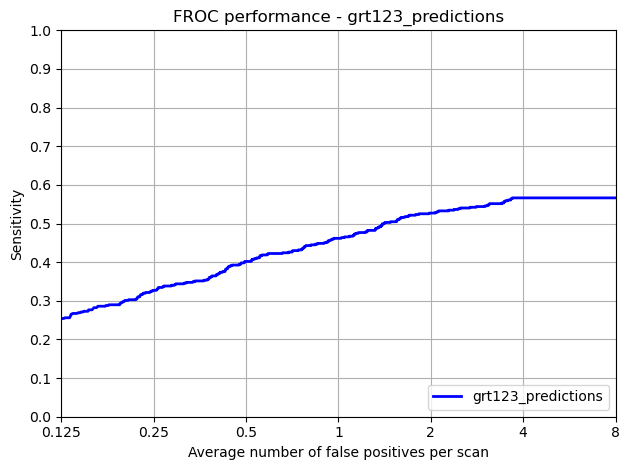

In [9]:
noduleCADEvaluation(annotations_filename=annotations_filepath,
                    annotations_excluded_filename=annotations_exclude_filepath,
                    seriesuids_filename=scanlist_filepath,
                    results_filename=predictions_filepath,
                    outputDir=output_dir)

In [10]:
# check the misses


def miss_check(model_name):
    misses = (
                pd.read_csv(f'../output/results/{model_name}/nodulesWithoutCandidate_{model_name}_predictions.txt', header=None)
                .rename(columns={
                    0:'name',
                    1:'idx',
                    2:'col',
                    3:'row',
                    4:'index',
                    5:'diameter',
                    6:'candidate_idx'}
                )
    )

    misses = (
                misses
                .merge(combined_nodule_data, left_on='idx', right_on='id', suffixes=['_miss', ''])
                .merge(validation_metadata, left_on='idx', right_index=True, suffixes=['', '_md'])
    )


    # Check distribution of type vs base distribution to see if one
    # type of nodule is being missed
    print('Nodule Type')
    print((pd.concat([
        misses.nodule_type.value_counts(normalize=True).rename('misses (%)'),
        validation_metadata.nodule_type.value_counts(normalize=True).rename('all (%)')
    ], axis=1).fillna(0) * 100).astype(int))

    print(2 * '\n')
    print('Management Plan')
    print((pd.concat([
        misses.management_plan.value_counts(normalize=True).rename('misses (%)'),
        validation_metadata.management_plan.value_counts(normalize=True).rename('all (%)')
    ], axis=1).fillna(0) * 100).astype(int))

    print(2 * '\n')
    print('Nodule Site')
    print((pd.concat([
        misses.nodule_site.value_counts(normalize=True, dropna=False).rename('misses (%)'),
        validation_metadata.nodule_site.value_counts(normalize=True, dropna=False).rename('all (%)')
    ], axis=1).fillna(0) * 100).astype(int))


    print(2 * '\n')
    print('Nodule Diameter')
    print((pd.concat([
        misses.diameter.describe().rename('misses (%)'),
        validation_metadata.nodule_diameter_mm.describe().rename('all (%)')
    ], axis=1)))


    print(2 * '\n')
    print('All - Site by Type (%)')
    display(
    (    pd.crosstab(
            validation_metadata.nodule_type,
            validation_metadata.nodule_site,
            margins=True,
            normalize=True
        ) * 100).astype(int)
    )

    print(2 * '\n')
    print('Misses - Site by Type (%)')
    display(
    (    pd.crosstab(
            misses.nodule_type,
            misses.nodule_site,
            margins=True,
            normalize=True
        ) * 100).astype(int)
    )

def get_missed_image_details(model_name):

    misses = (
            pd.read_csv(f'../output/results/{model_name}/nodulesWithoutCandidate_{model_name}_predictions.txt', header=None)
            .rename(columns={
                0:'name',
                1:'idx',
                2:'col',
                3:'row',
                4:'index',
                5:'diameter',
                6:'candidate_idx'}
            ))

    misses = misses.merge(validation_metadata.rename(columns={'index':'nodule_index'}), left_on='idx', right_index=True)

    return [
        (
            missed_nodule['name'],
            Ircd(
                index=int(missed_nodule['index']),
                row=int(missed_nodule['row']),
                col=int(missed_nodule['col']),
                diameter=int(missed_nodule['diameter'])
            ),
            missed_nodule['nodule_type'])
        for idx, missed_nodule in misses.iterrows()
    ]

miss_check('grt123')

grt123_missed_image_details = get_missed_image_details('grt123')

Nodule Type
               misses (%)  all (%)
SOLID                  32       43
CALCIFIED              31        6
NON_SOLID              21        3
PART_SOLID              9        3
ENDOBRONCHIAL           5        1
PERIFISSURAL            0       41



Management Plan
                         misses (%)  all (%)
3_MONTH_FOLLOW_UP_SCAN           75       24
ALWAYS_SCAN_AT_YEAR_1            21        3
URGENT_REFERRAL                   3        2
RANDOMISATION_AT_YEAR_1           0       69



Nodule Site
                   misses (%)  all (%)
RIGHT_UPPER_LOBE           37       24
LEFT_UPPER_LOBE            22       15
RIGHT_LOWER_LOBE           15       18
NOT_ANSWERED               12       15
LEFT_LOWER_LOBE             6       16
RIGHT_MIDDLE_LOBE           5        9



Nodule Diameter
       misses (%)      all (%)
count  232.000000  1759.000000
mean     6.483509     7.316202
std      4.568256     4.959221
min      0.000000     0.000000
25%      3.993748     4.500000
50%   

nodule_site,LEFT_LOWER_LOBE,LEFT_UPPER_LOBE,NOT_ANSWERED,RIGHT_LOWER_LOBE,RIGHT_MIDDLE_LOBE,RIGHT_UPPER_LOBE,All
nodule_type,,,,,,,
CALCIFIED,0,1,0,1,0,1,6
ENDOBRONCHIAL,0,0,0,0,0,0,1
NON_SOLID,0,0,0,0,0,1,3
PART_SOLID,0,0,0,0,0,1,3
PERIFISSURAL,7,4,9,7,6,6,41
SOLID,6,8,4,8,2,12,43
All,16,15,15,18,9,24,100





Misses - Site by Type (%)


nodule_site,LEFT_LOWER_LOBE,LEFT_UPPER_LOBE,NOT_ANSWERED,RIGHT_LOWER_LOBE,RIGHT_MIDDLE_LOBE,RIGHT_UPPER_LOBE,All
nodule_type,,,,,,,
CALCIFIED,2,7,3,5,3,9,31
ENDOBRONCHIAL,0,0,3,1,0,0,5
NON_SOLID,2,4,0,1,0,11,21
PART_SOLID,0,1,1,1,0,3,9
SOLID,1,8,3,4,1,13,32
All,6,22,12,15,5,37,100


# Detection Evaluation

In [17]:
"""
    The evaluation script accepts 4 parameters

    1. annotations_filename: csv file with following headers:
        - threshold
        - index
        - row
        - col
        - diameter
        - nodule_type
        - brock_score
        - management_plan

    NOTE: Additional nodule fields will need to be added in eval script, fields are hard-coded
    into a nodule class

    2. annotations_excluded_filename: csv containing non-actionable or benign lesions,
    headers as per annotations_filename

    3. seriesuids_filename: single column csv file holding just the scan identifiers

    4. results_filename: csv containing the candidates generated from the detection algorithm.
    Headers as follows:
        - threshold
        - index
        - row
        - col
        - diameter

    5. outputdir: folder to output results to

"""

detect_nodule_annotations = (
    validation_metadata
    .rename(
    columns={
        'index' : 'idx',
        'nodule_x_coordinate' : 'col',
        'nodule_y_coordinate' : 'row',
        'nodule_z_coordinate' : 'index',
        'nodule_diameter_mm' : 'diameter'
    })
    .assign(name=lambda df: df.main_participant_id + '_Y0_BASELINE_A')
    .assign(threshold=MIN_THRESHOLD)
)[['name','threshold','index','row','col','diameter','nodule_type','nodule_brock_score','management_plan']]
detect_nodule_annotations.index.rename('id',inplace=True)

exclude = detect_nodule_annotations.management_plan=='RANDOMISATION_AT_YEAR_1'

detect_nodule_exclude_annotations = detect_nodule_annotations[exclude]
detect_nodule_exclude_annotations.to_csv('../output/results/detect_nodule_exclude_annotations.csv')

detect_nodule_include_annotations = detect_nodule_annotations[~exclude]
detect_nodule_include_annotations.to_csv('../output/results/detect_nodule_annotations.csv')

scan_list = pd.read_csv('../output/metadata/validation_scans.csv')['scan_id'].tolist()
with open('../output/results/detect_scanslist.csv', 'w') as f:
    for scan_id in scans_list:
        f.write(scan_id)
        f.write('\n')

In [18]:
"""
Deconstruct the json output into the correct format of

    threshold
    index -> z
    row -> y
    col -> x
    diameter
    name -> scan_id
"""
import json
with open('../models/summit_detection/result/result_summit_fold0.json','r') as f:
    fold0_json = json.load(f)

predictions = {}
idx = 0
for image in fold0_json['validation']:
    name = image['image'].split('/')[-1].split('.',1)[0]
    
    for box, score in zip(image['box'], image['score']):
        prediction = {}
        prediction['threshold'] = score
        prediction['index'] = box[2]
        prediction['row'] = box[1]
        prediction['col'] = box[0]
        prediction['diameter'] = np.max(box[3:])
        prediction['name'] = name

        predictions[idx] = prediction
        idx+=1

detect_predictions = pd.DataFrame.from_dict(predictions,orient='index')
detect_predictions.to_csv('../output/results/detect_predictions.csv', index=False)

In [21]:
# Reduce to subset
scans_subset = detect_predictions.name.unique()
detect_nodule_include_annotations = detect_nodule_include_annotations[detect_nodule_include_annotations.name.isin(scans_subset)]
detect_nodule_include_annotations.to_csv('../output/results/detect_nodule_annotations.csv')

detect_nodule_exclude_annotations = detect_nodule_exclude_annotations[detect_nodule_exclude_annotations.name.isin(scans_subset)]
detect_nodule_exclude_annotations.to_csv('../output/results/detect_nodule_exclude_annotations.csv')

with open('../output/results/detect_scanslist.csv', 'w') as f:
    for scan_id in scans_subset:
        f.write(scan_id)
        f.write('\n')


../output/results/detect_nodule_annotations.csv
adding nodule annotations: summit-8222-tjf_Y0_BASELINE_A
adding nodule annotations: summit-2392-ref_Y0_BASELINE_A
adding nodule annotations: summit-4238-udg_Y0_BASELINE_A
adding nodule annotations: summit-4572-ghv_Y0_BASELINE_A
adding nodule annotations: summit-6429-apc_Y0_BASELINE_A
adding nodule annotations: summit-8349-zzn_Y0_BASELINE_A
adding nodule annotations: summit-7453-ypc_Y0_BASELINE_A
adding nodule annotations: summit-5755-nna_Y0_BASELINE_A
adding nodule annotations: summit-8797-xwv_Y0_BASELINE_A
adding nodule annotations: summit-3585-ynz_Y0_BASELINE_A
adding nodule annotations: summit-6235-nhn_Y0_BASELINE_A
adding nodule annotations: summit-4423-yap_Y0_BASELINE_A
adding nodule annotations: summit-2657-qmy_Y0_BASELINE_A
adding nodule annotations: summit-3672-gcv_Y0_BASELINE_A
adding nodule annotations: summit-2475-jtm_Y0_BASELINE_A
adding nodule annotations: summit-9426-rvt_Y0_BASELINE_A
adding nodule annotations: summit-9735-h

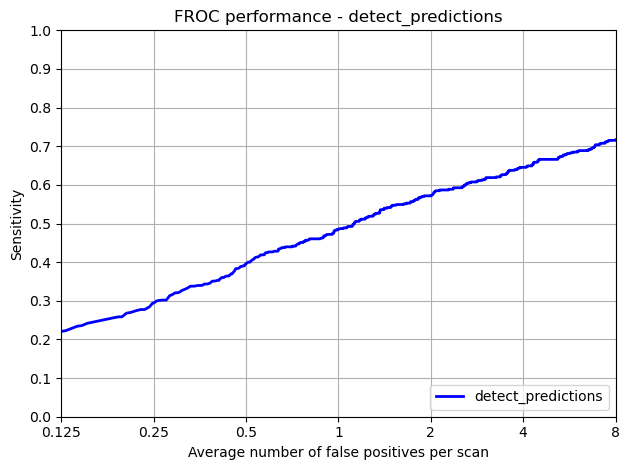

In [22]:
noduleCADEvaluation(annotations_filename='../output/results/detect_nodule_annotations.csv',
                    annotations_excluded_filename='../output/results/detect_nodule_exclude_annotations.csv',
                    seriesuids_filename='../output/results/detect_scanslist.csv',
                    results_filename='../output/results/detect_predictions.csv',
                    outputDir='../output/results/detect')

In [15]:
miss_check('detect')

detect_missed_image_details = get_missed_image_details('detect')

Nodule Type
               misses (%)  all (%)
SOLID                  41       43
CALCIFIED              22        6
PERIFISSURAL           22       41
NON_SOLID               5        3
ENDOBRONCHIAL           4        1
PART_SOLID              4        3



Management Plan
                         misses (%)  all (%)
RANDOMISATION_AT_YEAR_1          47       69
3_MONTH_FOLLOW_UP_SCAN           44       24
ALWAYS_SCAN_AT_YEAR_1             4        3
URGENT_REFERRAL                   3        2



Nodule Site
                   misses (%)  all (%)
RIGHT_UPPER_LOBE           28       24
NOT_ANSWERED               27       15
RIGHT_LOWER_LOBE           16       18
LEFT_UPPER_LOBE            13       15
LEFT_LOWER_LOBE             9       16
RIGHT_MIDDLE_LOBE           4        9



Nodule Diameter
       misses (%)      all (%)
count  250.000000  1759.000000
mean     5.245462     7.316202
std      4.110068     4.959221
min      0.000000     0.000000
25%      2.658107     4.500000
50%   

nodule_site,LEFT_LOWER_LOBE,LEFT_UPPER_LOBE,NOT_ANSWERED,RIGHT_LOWER_LOBE,RIGHT_MIDDLE_LOBE,RIGHT_UPPER_LOBE,All
nodule_type,,,,,,,
CALCIFIED,0,1,0,1,0,1,6
ENDOBRONCHIAL,0,0,0,0,0,0,1
NON_SOLID,0,0,0,0,0,1,3
PART_SOLID,0,0,0,0,0,1,3
PERIFISSURAL,7,4,9,7,6,6,41
SOLID,6,8,4,8,2,12,43
All,16,15,15,18,9,24,100





Misses - Site by Type (%)


nodule_site,LEFT_LOWER_LOBE,LEFT_UPPER_LOBE,NOT_ANSWERED,RIGHT_LOWER_LOBE,RIGHT_MIDDLE_LOBE,RIGHT_UPPER_LOBE,All
nodule_type,,,,,,,
CALCIFIED,3,2,3,4,2,6,22
ENDOBRONCHIAL,0,0,2,1,0,0,4
NON_SOLID,0,1,0,0,0,3,5
PART_SOLID,0,0,0,1,0,1,4
PERIFISSURAL,4,0,9,3,0,4,22
SOLID,1,8,11,6,2,12,41
All,9,13,27,16,4,28,100


In [26]:
# Check whether there are any nodules that both missed
from math import isclose

def same_nodule(miss_1, miss_2):

    if miss_1[0] == miss_2[0] and isclose(miss_1[1].diameter, miss_2[1].diameter, abs_tol=0.1):
        return True
    else:
        return False

both_missed = [
    grt_miss
    for grt_miss in grt123_missed_image_details
    for dct_miss in detect_missed_image_details
    if same_nodule(grt_miss, dct_miss)
]



[('summit-5755-nna_Y0_BASELINE_A',
  Ircd(index=239, row=103, col=84, diameter=5),
  'SOLID'),
 ('summit-7938-hbx_Y0_BASELINE_A',
  Ircd(index=173, row=111, col=132, diameter=0),
  'ENDOBRONCHIAL'),
 ('summit-4672-rjd_Y0_BASELINE_A',
  Ircd(index=205, row=160, col=75, diameter=0),
  'CALCIFIED'),
 ('summit-4647-qgb_Y0_BASELINE_A',
  Ircd(index=117, row=157, col=99, diameter=3),
  'NON_SOLID'),
 ('summit-8998-kpf_Y0_BASELINE_A',
  Ircd(index=237, row=88, col=104, diameter=6),
  'NON_SOLID'),
 ('summit-9278-gja_Y0_BASELINE_A',
  Ircd(index=106, row=73, col=30, diameter=6),
  'NON_SOLID'),
 ('summit-7684-hzk_Y0_BASELINE_A',
  Ircd(index=203, row=65, col=78, diameter=3),
  'NON_SOLID'),
 ('summit-2296-exp_Y0_BASELINE_A',
  Ircd(index=143, row=96, col=120, diameter=8),
  'SOLID'),
 ('summit-3743-tru_Y0_BASELINE_A',
  Ircd(index=73, row=59, col=17, diameter=0),
  'CALCIFIED'),
 ('summit-3743-tru_Y0_BASELINE_A',
  Ircd(index=73, row=59, col=17, diameter=0),
  'CALCIFIED'),
 ('summit-3743-tru_